<a href="https://colab.research.google.com/github/jelly12paw/00/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("http://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['Survived'] = df['Survived'].astype(str) # astype() : 변수 타입 변경
df['Pclass'] = df['Pclass'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

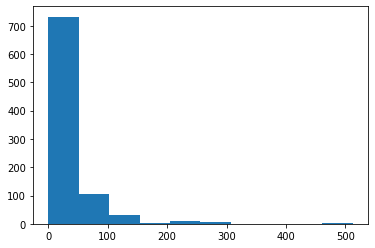

In [18]:
plt.hist(df['Fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


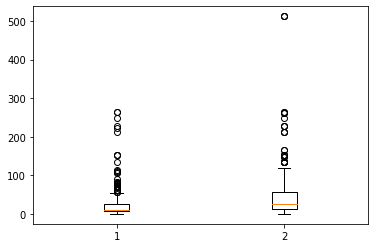

In [19]:
d1 = df[df['Survived'] =='0']['Fare']
d2 = df[df['Survived'] =='1']['Fare']

fig, ax = plt.subplots()
ax.boxplot([d1, d2])
plt.show()

In [21]:
d = df.groupby('Sex')
d.size()

Sex
female    314
male      577
dtype: int64

In [29]:
f = df[df['Sex'] == 'female']['Survived']
m = df[df['Sex'] == 'male']['Survived']

f1 = pd.DataFrame(f).groupby('Survived')
print(f1.size())

m1 = pd.DataFrame(m).groupby('Survived')
print(m1.size())

Survived
0     81
1    233
dtype: int64
Survived
0    468
1    109
dtype: int64


In [40]:
meat_kor = 5 * np.random.randn(1000) + 53.9  # 한국인 1000명 육류소비량 53.9kg, 표준편차 5인 난수
meat_jpn = 4 * np.random.randn(1000) + 32.7  # 일본인 1000명 육류소비량 32.7kg, 표준편차 4인 난수

meat_con = pd.DataFrame({'한국인' : meat_kor, '일본인' : meat_jpn})

meat_con.tail()

,한국인,일본인
995,56.706752,41.607344
996,53.586550,37.826836
997,59.690002,32.117965
998,48.376831,32.283164
999,51.913688,30.675423


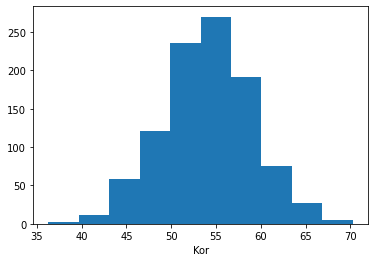

In [41]:
plt.hist(meat_kor)
plt.xlabel('Kor')
plt.show()

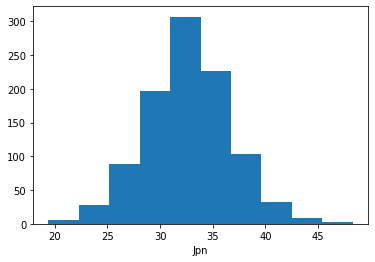

In [42]:
plt.hist(meat_jpn)
plt.xlabel('Jpn')
plt.show()

In [46]:
# zscore() 표준화

meat_con['한국인_정규화'] = ss.zscore(meat_kor)
meat_con['일본인_정규화'] = ss.zscore(meat_jpn)

meat_con.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,53.204839,27.001892,-0.166695,-1.415502
1,52.304109,30.845917,-0.345872,-0.452947
2,51.146025,35.206667,-0.576243,0.638997
3,48.904583,29.624616,-1.022121,-0.758765
4,59.800738,33.817428,1.145391,0.291127


In [53]:
# numpy로 표준화하기 : x - np.mean(x) / np.std(x)

np_kor_z = (meat_kor - np.mean(meat_kor)) / np.std(meat_kor)

print('한국인_정규화', np_kor_z[:5])

np_jpn_z = (meat_jpn - np.mean(meat_jpn)) / np.std(meat_jpn)

print('일본인_정규화', np_jpn_z[:5])

한국인_정규화 [-0.16669485 -0.3458721  -0.57624323 -1.02212085  1.14539052]
일본인_정규화 [-1.41550225 -0.45294732  0.63899691 -0.75876454  0.29112743]


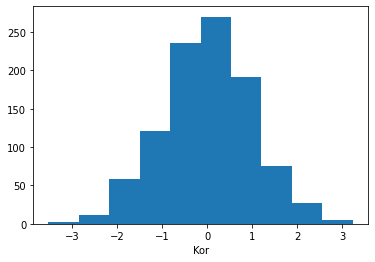

In [55]:
plt.hist(meat_con['한국인_정규화'])
plt.xlabel('Kor')
plt.show()

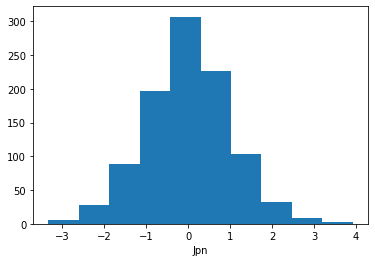

In [56]:
plt.hist(meat_con['일본인_정규화'])
plt.xlabel('Jpn')
plt.show()

In [70]:
# 사이킷런 스케일러 정규화

scaler = StandardScaler()
s_kor = scaler.fit_transform(meat_con[['한국인']])
print('한국인', s_kor[:5])

s_jpn = scaler.fit_transform(meat_con[['일본인']])
print('일본인', s_jpn[:5])

한국인 [[-0.16669485]
 [-0.3458721 ]
 [-0.57624323]
 [-1.02212085]
 [ 1.14539052]]
일본인 [[-1.41550225]
 [-0.45294732]
 [ 0.63899691]
 [-0.75876454]
 [ 0.29112743]]


In [75]:
# 최소 최대 정규화

minmax = MinMaxScaler()

mm_kor = minmax.fit_transform(meat_con[['한국인']])
print('한국인', mm_kor[:5])

mm_jpn = minmax.fit_transform(meat_con[['일본인']])
print('일본인', mm_jpn[:5])

# numpy로 최소 최대 정규화 : (x - np.min()) / (np.max() - np.min(x))

min_kor = np.min(meat_kor)
max_kor = np.max(meat_kor)

nm_kor = (meat_con[['한국인']] - min_kor) / (max_kor - min_kor)
print(nm_kor[:5])

min_jpn = np.min(meat_jpn)
max_jpn = np.max(meat_jpn)

nm_jpn = (meat_con[['일본인']] - min_jpn) / (max_jpn - min_jpn)
print(nm_jpn[:5])

한국인 [[0.49766139]
 [0.47116152]
 [0.43709019]
 [0.37114598]
 [0.69171562]]
일본인 [[0.26310774]
 [0.39606657]
 [0.54689809]
 [0.35382368]
 [0.49884648]]
        한국인
0  0.497661
1  0.471162
2  0.437090
3  0.371146
4  0.691716
        일본인
0  0.263108
1  0.396067
2  0.546898
3  0.353824
4  0.498846
